#  Dimensionality Reduction, Feature Extraction, and Manifold Learning

As we discussed earlier, transforming data using unsupervised learning can have
many motivations. 

The most common motivations are **visualization**, compressing the data, and finding a representation that is more informative for further processing.
 
One of the simplest and most widely used algorithms for all of these is **principal component analysis**. 

We’ll also look at two other algorithms: **non-negative matrix factori
zation (NMF)**, which is commonly used for feature extraction, 

and **t-SNE**, which is commonly used for visualization using two-dimensional scatter plots.

## PCA
 Principal component analysis is a method that rotates the dataset in a way such that
 the rotated features are statistically uncorrelated. 
 
 This rotation is often followed by selecting only a subset of the new features, according to how important they are for
 explaining the data. 
 
 The following example (Figure 3-3) illustrates the effect of PCA
 on a synthetic two-dimensional dataset:

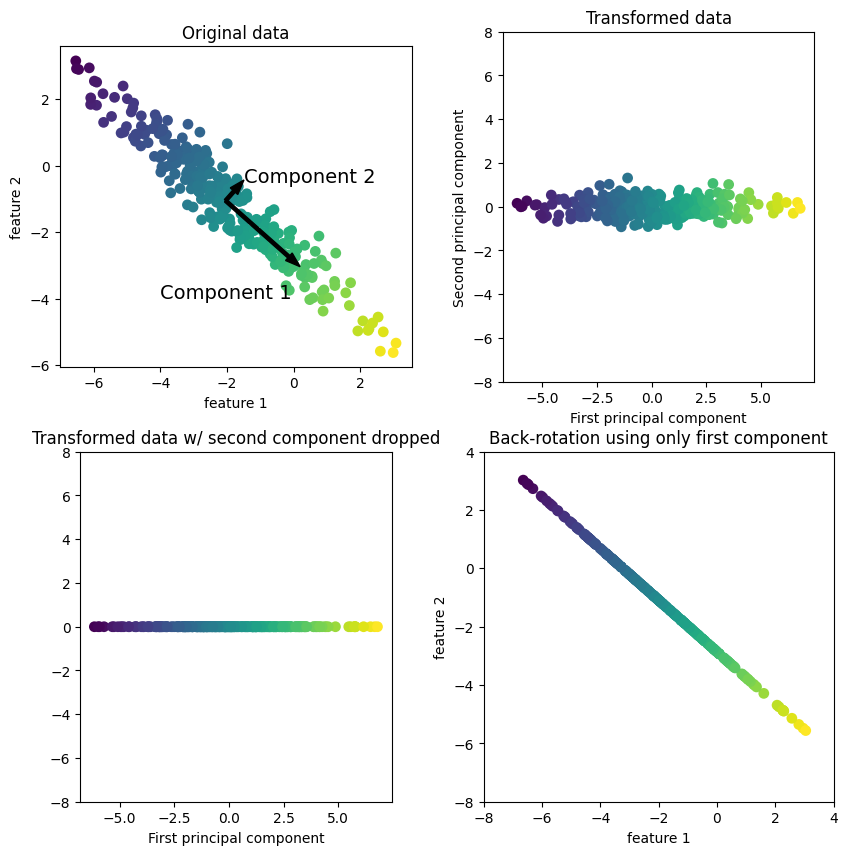

In [4]:
mglearn.plots.plot_pca_illustration()

##  How PCA Transforms Data

🖼️ Panel 1: Original Data (Top Left)

> 🔹 Shows raw 2D data points — colored to distinguish clusters or patterns.

➡️ PCA starts here — it looks at how features vary together.

 💡 Key Idea:

- PCA finds the **direction of maximum variance** → called **“Component 1”**.
- This is the line along which data spreads out the most — meaning it holds the most information.
- Then it finds the **second direction**, orthogonal(正交) (at 90°) to the first → **“Component 2”**.

> ✅ These directions are called **principal components** — they’re the main “axes” of variation in your data.

---
### Rotation

Aligns components with axes → simplifies interpretation


 🖼️ Panel 2: Rotated & Centered Data (Top Right)

> 🔹 The same data, now rotated so:
> 
> - Component 1 aligns with the **x-axis**
> - Component 2 aligns with the **y-axis**

Before rotation, PCA subtracts the **mean** from all data → centers it around zero.

💡 Why?

- Makes math easier
- Removes bias
- Ensures new axes are uncorrelated → correlation matrix becomes diagonal (only diagonal values ≠ 0)
- （也就是说，对于这种数据表示，
除了对角线，相关矩阵全部为零。）

➡️ This means: **The two principal components are independent** — no redundancy!

---

### Dimensionality Reduction

Keep only top components → reduce features while preserving info


 🖼️ Panel 3: Keep Only First Component (Bottom Left)

> 🔹 We drop Component 2 → keep only Component 1 → reduces data from 2D to 1D.

This is **dimensionality reduction**!

💡 ***Important Note:***

- We’re NOT keeping one original feature — we’re keeping the **most informative direction** found by PCA.
- In this case, that’s the diagonal line from top-left to bottom-right in Panel 1.

✅ So instead of losing info by dropping a feature, we keep the *most important pattern* in the data.

---

### Back-Rotation

Projects simplified data back into original space → helps visualization


 🖼️ Panel 4: Back-Rotation (Bottom Right)

> 🔹 We rotate the 1D data back into the original feature space — and add the mean back.

Now you see:

- Points lie along the **first principal component line** in the original coordinate system.
- **All other variation (noise, less important patterns) is removed**.

 💡 Why Do This?

- To visualize what part of the original data was preserved.
- Useful for **denoising** or understanding which features contribute most to variation.

## Applying PCA to the cancer dataset for visualization
One of the most common applications of PCA is ***visualizing high-dimensional data
sets***.

As we saw in Chapter 1, it is hard to create **scatter plots**(散点图) of data that has more
 than two features. 
 
 For the Iris dataset, we were able to create a pair plot (Figure 1-3 in
 Chapter 1) that gave us a partial picture of the data by showing us all the possible
 combinations of two features. 
 
 But if we want to look at the Breast Cancer dataset,
 even using a pair plot is tricky. 
 
 This dataset has 30 features, which would result in
 30 * 14 = 420 scatter plots! We’d never be able to look at all these plots in detail, let
 alone try to understand them.
 
 There is an even simpler visualization we can use, though—computing ***histograms***(直方图) of
 each of the features for the two classes, benign and malignant cancer (Figure 3-4):

NameError: name 'cancer' is not defined

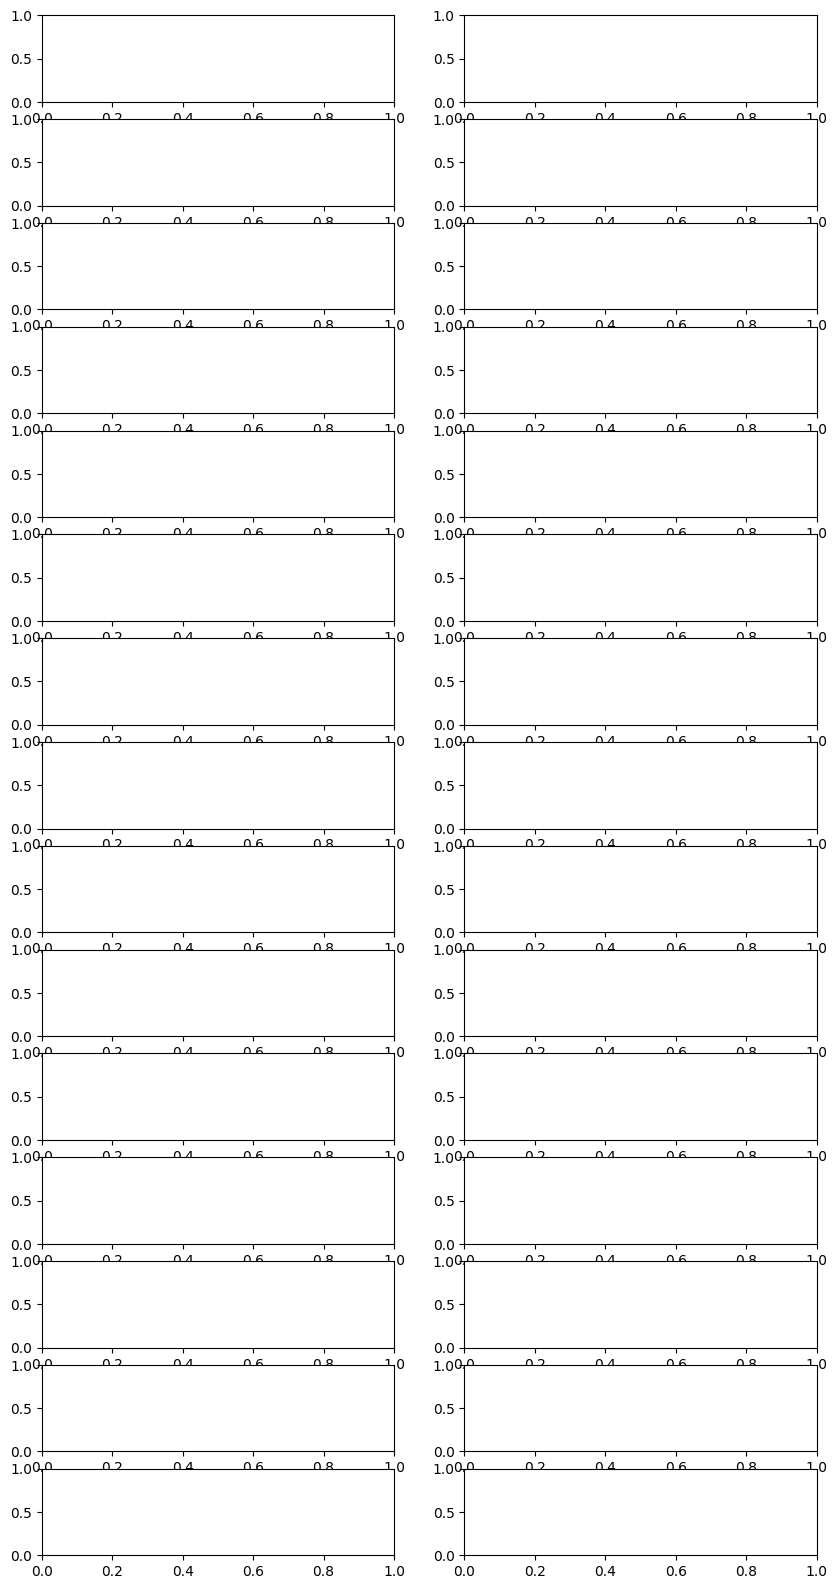

In [6]:
 fig, axes = plt.subplots(15, 2, figsize=(10, 20))
 malignant = cancer.data[cancer.target == 0]
 benign = cancer.data[cancer.target == 1]
 ax = axes.ravel()
 for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
 ax[0].set_xlabel("Feature magnitude")
 ax[0].set_ylabel("Frequency")
 ax[0].legend(["malignant", "benign"], loc="best")
 fig.tight_layout()

### scale the data
Before we apply PCA, we scale our data so that each feature has unit variance using
 StandardScaler:

In [ ]:
 from sklearn.datasets import load_breast_cancer
 cancer = load_breast_cancer()
 scaler = StandardScaler()
 scaler.fit(cancer.data)
 X_scaled = scaler.transform(cancer.data)

### instantiate and transform
We instantiate the PCA object, find the principal components
 by calling the fit method, and then apply the rotation and dimensionality reduction
 by calling transform. 
 
 By default, PCA only rotates (and shifts) the data, but keeps all
 principal components. 
 
 To reduce the dimensionality of the data, we need to specify
 how many components we want to keep when creating the PCA object:

In [ ]:
 from sklearn.decomposition import PCA
 # keep the first two principal components of the data
 pca = PCA(n_components=2)
 # fit PCA model to breast cancer data
 pca.fit(X_scaled)
 # transform data onto the first two principal components
 X_pca = pca.transform(X_scaled)
 print("Original shape: {}".format(str(X_scaled.shape)))
 print("Reduced shape: {}".format(str(X_pca.shape)))

###  Two-dimensional scatter plot

In [ ]:
 # plot first vs. second principal component, colored by class
 plt.figure(figsize=(8, 8))
 mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
 plt.legend(cancer.target_names, loc="best")
 plt.gca().set_aspect("equal")
 plt.xlabel("First principal component")
 plt.ylabel("Second principal component")

It is important to note that PCA is an unsupervised method

 “PCA is unsupervised — it doesn’t use class labels when finding the rotation.”  
→ That means: PCA didn’t know which points were benign or malignant — it just looked at the **correlations** in the data.

But after PCA, we used the labels to color the points — that’s why we can see separation.

---------

***Why Is This Useful?***

Because now we can say:

> Even though PCA didn’t use class info, the two classes still separate well in 2D → so a simple linear classifier (like SVM or Logistic Regression) could probably do a good job here!

-------

***downside***

A downside of PCA is that ***the two axes in the plot are often not very easy to interpret***.
     
 The principal components correspond to directions in the original data, so they are
 combinations of the original features. 
     
However, these combinations are usually very complex, as we’ll see shortly. 


Why? Because each principal component is a **weighted combination** of many original features.

Example:

- PC1 might be: `0.2*radius + 0.1*texture - 0.3*perimeter + ...` → Not intuitive like “tumor size” or “color”

So while PCA helps visualize and simplify data, it doesn’t always give you clear, human-readable meanings.

---------------


     
**The principal components themselves are stored in the
 components_ attribute of the PCA object during fitting**:
     

In [ ]:
print("PCA component shape: {}".format(pca.components_.shape))

### ***What is `pca.components_`?***

It stores the **directions** (vectors) of the principal components in the original feature space.

- Shape `(2, 30)` → 2 components, each is a combination of 30 original features.
- Each row = one principal component
- Columns = original features (like “mean radius”, “mean texture”, etc.)

---------------

     
Let’s have a look at the content of components_:

In [ ]:
print("PCA components:\n{}".format(pca.components_))

### Heat map of the first two principal components 
 We can also visualize the coefficients using a heat map (Figure 3-6), which might be
 easier to understand:

In [ ]:
 plt.matshow(pca.components_, cmap='viridis')
 plt.yticks([0, 1], ["First component", "Second component"])
 plt.colorbar()
 plt.xticks(range(len(cancer.feature_names)),
 cancer.feature_names, rotation=60, ha='left')
 plt.xlabel("Feature")
 plt.ylabel("Principal components")

***Explaination***

***PC1***

All squares are **greenish-yellow**, meaning:

> All features have **positive values** in the first PC.

But wait — the text says:

> “In the first component, all features have the same sign (it’s negative...)”

Wait… what? Green = positive, but text says “negative”?

📌 Here’s the key:

> The **sign doesn’t matter** in PCA!  
> Because if you flip the direction of a PC (multiply by -1), it still captures the same variance.

So even though the plot shows green (positive), the actual numbers might be negative — but since we care about *magnitude* and *relative importance*, not direction, it’s okay.

✅ What matters:

> All features move together → when one is high, others tend to be high too → strong correlation!

This is why the text says:

> “There is a general correlation between all features.”

---------

***PC2***

Here you see mixed signs: some green (positive), some purple (negative).

That means:

Some features contribute positively to PC2, others negatively. 

This is called “mixing” — ***PC2 is trying to capture differences between features***.

--------

***PCA creates two “super sensors”***:

🎯 First Super Sensor (PC1):

> “Overall Size & Density” — all measurements go up together → green across the board.

🎯 Second Super Sensor (PC2):

> “Shape vs Texture” — some features go up, others go down → mixed colors.



## Feature Extraction

Think of it like this:

You have raw data → like 30 numbers per tumor → hard to understand
PCA turns them into 2 “super features” → easier to visualize and classify

> Feature extraction helps us reduce complexity while keeping the most important patterns.


##  the Labeled Faces 
 We will give a very simple application of feature extraction on images using PCA, by
 working with face images from **the Labeled Faces** in the Wild dataset. 

 We use gray
scale versions of these images, and scale them down for faster processing. You can see
 some of the images in Figure 3-7:

### 1. dataset shapes and class distribution

In [ ]:
 from sklearn.datasets import fetch_lfw_people
 people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
 image_shape = people.images[0].shape
 fix, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
 for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [ ]:
 print("people.images.shape: {}".format(people.images.shape))
 print("Number of classes: {}".format(len(people.target_names)))

***Explaination***

- You have **3023 face images**
- From **62 different people**
- Each image is **87×65 pixels** → total 5655 features per face (if flattened)

### 2.  Count How Many Images Per Person 

In [ ]:
 # count how often each target appears
 counts = np.bincount(people.target)
 # print counts next to target names
 for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25} {1:3}".format(name, count), end='   ')
  if (i + 1) % 3 == 0:
   print()

✅ What It Does:

1. `np.bincount(people.target)` → counts how many times each class (person) appears  
	→ Returns an array: `[count_for_person_0, count_for_person_1, ...]`
2. `zip(counts, people.target_names)` → pairs each count with the person’s name
3. `enumerate(...)` → gives us index `i` (starting from 0)
4. `"{0:25} {1:3}"` → formats output:
	- `{0:25}` → person name, left-aligned in 25 characters
	- `{1:3}` → count, right-aligned in 3 characters
5. `end=' '` → don’t go to new line after each print
6. `if (i + 1) % 3 == 0: print()` → after every 3 people, go to new line → makes it readable!

---------

🎯 Why do this?

> To see if the dataset is **balanced** or **skewed**.

Here, some people have only 20–25 images, others may have more → but not extremely unbalanced.

### 3. **Make Data Less Skewed**

To make the data less skewed, we will only take up to 50 images of each person” :

This is a smart preprocessing trick — because if one person has 1000 images and another has 20, the model might just learn to recognize the popular person better.

So we limit each person to at most 50 images.

In [ ]:
 mask = np.zeros(people.target.shape, dtype=np.bool)
 for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1
 X_people = people.data[mask]
 y_people = people.target[mask]
 # scale the grayscale values to be between 0 and 1
 # instead of 0 and 255 for better numeric stability
 X_people = X_people / 255.

X_people = X_people / 255.

→ Normalize pixel values from 0–255 to 0–1 → better for numerical stability in ML models

💡 Why normalize?

Because algorithms like KNN, SVM, Logistic Regression work better when features are on similar scales.

### ***The problems of face congnition***

✅ What’s the Problem?

> In face recognition, we often want to answer:  
> **“Does this new face belong to someone we already know?”**

Example applications:

- Photo collection (e.g., Google Photos)
- Social media (tagging friends)
- Security systems (unlock phone with face)

---

❗ The Challenge:

1. **Many people, few images per person**  
	→ Usually only 1–5 photos per person in database  
	→ Not enough data to train complex models like SVM or Neural Networks
2. **Need to add new people easily**  
	→ You don’t want to retrain the whole model every time you add a new person!



### 4. **Train a Simple Classifie**


“A simple solution is to use a one-nearest-neighbor classifier that looks for the most similar face image to the face you are classifying.” 

 This classifier could in principle
 work with only a single training example per class. 
 
 Let’s take a look at how well ***KNeighborsClassifier*** does here:

 Let’s take a look at how well
 KNeighborsClassifier does here:

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 # split the data into training and test sets
 X_train, X_test, y_train, y_test = train_test_split(
  X_people, y_people, stratify=y_people, random_state=0)
 # build a KNeighborsClassifier using one neighbor
 knn = KNeighborsClassifier(n_neighbors=1)
 knn.fit(X_train, y_train)
 print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

So 22% is better than random — but still not great.

Why? Because:

### Comparing Faces Using Raw Pixels Is Not Smart

“Computing distances in the original pixel space is quite a bad way to measure similarity between faces.” 

🎯 Why?

Because:

1. **Humans don’t see faces pixel-by-pixel**  
	→ We look at features: eyes, nose, mouth, shape — not individual brightness values.

2. **Small shifts cause big changes**  

3. **Pixel-based comparison ignores structure**  
	→ Two faces with same expression but different lighting → very different pixel values → treated as unrelated


---------

### Solution: Use PCA to Transform the Data First!

✅ Idea:

- Instead of comparing raw pixels → compare **PCA-transformed features**
- PCA finds directions (components) that capture the most important facial patterns
- Distances in PCA space are more meaningful → less sensitive to small shifts or lighting changes

Also:

> “We enable the whitening option of PCA, which rescales the principal components to have the same scale.”  
> → Like `StandardScaler` after PCA → makes all PCs equally important

（the whitening 白化）

这里我们启用PCA的白化（whitening）选项，它将主成分缩放到相同的尺
度。变换后的结果与使用StandardScaler相同。再次使用图3-3中的数据，白化不仅对应
于旋转数据，还对应于缩放数据使其形状是圆形而不是椭圆（参见图3-8）：

### 利用启用白化的PCA进行数据变换

In [ ]:
mglearn.plots.plot_pca_whitening()

 We fit the PCA object to the training data and extract the first 100 principal components. Then we transform the training and test data:

In [ ]:
 pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
 X_train_pca = pca.transform(X_train)
 X_test_pca = pca.transform(X_test)
 print("X_train_pca.shape: {}".format(X_train_pca.shape))

 The new data has 100 features, the first 100 principal components.
 
 Now, we can use
 the new representation to classify our images using a one-nearest-neighbors classifier:

In [ ]:
 knn = KNeighborsClassifier(n_neighbors=1)
 knn.fit(X_train_pca, y_train)
 print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

 Our accuracy improved quite significantly, from 26.6% to 35.7%, confirming our
 intuition that the principal components might provide a better representation of the
 data.

For image data, we can also easily visualize the principal components that are found.
 Remember that components correspond to directions in the input space. The input
 space here is 50×37-pixel grayscale images, so directions within this space are also
 50×37-pixel grayscale images.
     
 Let’s look at the first couple of principal components